# Bank Churn Prediction
## Steps

#### 1. Load and Explore Data
- 1.1. Import necessary libraries.
- 1.2. Load the dataset.
- 1.3. Check the shape of the dataset. Identify the number of duplicate rows.
- 1.4. Assess data quality: identify missing values and % of missing values.
- 1.5. Identify Numerical and Categorical columns and analyze them separately:
  - 1.5.1. Check column names with numerical data types from the dataframe. Count and sort the unique values for each numerical column in descending order.
  - 1.5.2. Retrieve column names with object data types from the dataframe.
  - (Standardize Column Names)
  - 1.5.3. Identify categorical variables from numerical formats, those with less than 20 unique values, and separate them from the rest of the numerical variables.
  - 1.5.4. Categorical variables from object data: Count and sort the unique values for each object (string) column in descending order.
  - 1.5.5. Extract columns with object data types to create a categorical dataframe. Hypothesis: All potential categorical columns from numerical data are categorical.
  - 1.5.6. Adjust the numerical dataframe by removing the moved columns.

#### 2. Pre-process Data. Data Cleaning
- 2.1. Deal with duplicates.
- 2.2. Standardize column names:
  - 2.2.1. Remove leading and trailing spaces and underscores.
  - 2.2.2. Replace non-alphanumeric characters with underscores.
  - 2.2.3. Convert column names from CamelCase to snake_case.
- 2.3. Correct data types.
- 2.4. Check domain-specific inconsistencies: check for inconsistencies or errors specific to the domain (e.g., unrealistic values, mismatches in categorical data).

#### 3. Univariate Analysis
- 3.1. Categorical variables:
  - 3.1.1. Frequency tables: Counts and proportions.
  - 3.1.2. Visualizations: Bar charts, pie charts.
- 3.2. Numerical variables:
  - 3.2.1. Summary Statistics. Measures of centrality: Mean, median, mode.
  - 3.2.2. Summary Statistics. Measures of dispersion: Variance, standard deviation, minimum, maximum, range, quantiles.
  - 3.2.3. Shape of the distribution: Skewness(asymmetry) and kurtosis("tailedness" how peaked the distribution is).
  - 3.2.4. Visualizations: Histograms, box plots.
- 3.3. Univariate Analysis Summary

#### 4. Bivariate Analysis
- 4.1. Categorical (including Discrete Numerical) vs Categorical
  - 4.1.1. Crosstab
  - 4.1.2.Chi-square tests, Cramér's V. Test the independence of variables
  - 4.1.3. Visualization:
    - 4.1.3.1. Stacked or grouped bar charts
    - 4.1.3.2. Frequency heat maps
  - 4.1.3. Summary for Categorical vs Categorical Analysis

- 4.2. Categorical vs Continuous
  - 4.2.1. Visualization:
    - 4.2.1.1. Violin Plots
    - 4.2.1.2. Bar Charts
    - 4.2.1.3. Side by side Box Plots
  
- 4.3. Continuous vs Continuous
  - 4.3.1. Correlation coefficients
  - 4.3.2. Visualization:
    - 4.3.2.1. Scatter plots
    - 4.3.2.2. Line plots
    - 4.3.2.3. Correlation Heatmaps
    - 4.3.2.4. QQ Plot
- 4.4. Bivariate Analysis Summary. Select target.


#### 5. Feature Engineering
- 5.1. Create an Analytical Base Table (ABT):
  - 5.1.1. Assemble the final dataset with all relevant features and target variables to be used for modeling.
- 5.2. Correlation Analysis:
  - 5.2.1. Identify and handle multicollinearity by checking if any features are highly correlated (e.g., Pearson correlation coefficient > 0.8).
  - 5.2.2. Remove one of the correlated features.
- 5.3. Handle Imbalanced Target:
  - 5.3.1. Check if the target variable is imbalanced.
  - 5.3.2. Apply techniques such as undersampling, oversampling (e.g., SMOTE), or class weight adjustments to balance the dataset.
  - 5.3.3. Visualize the data: Power BI, Tableau, or Streamlit to explore the balanced dataset and features.

#### 6. Model Building
- 6.1. Data Splitting:
  - 6.1.1. Split the data into training and testing sets (e.g., 80/20 or 70/30 split).
- 6.2. PCA and Normalization:
  - 6.2.1. Apply PCA only on the training set to prevent data leakage.
  - 6.2.2. Normalize or standardize the data after applying PCA to ensure features are on a similar scale.
- 6.3. Model Selection:
  - 6.3.1. Choose different models (e.g., XGBoost, Random Forest, SVM, Logistic Regression, and Neural Networks).
- 6.4. Hyperparameter Tuning and Cross-Validation:
  - 6.4.1. Perform hyperparameter tuning using techniques like Grid Search or Random Search combined with cross-validation (e.g., 5-fold or 10-fold).
- 6.5. Automate Model Training:
  - 6.5.1. Implement a function to train all selected models and compare their performance metrics.
- 6.6. Model Evaluation:
  - 6.6.1. Compare models using evaluation metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).
  - 6.6.2. Select the model with the best performance based on these metrics.


---

# Project

## 1. Load and Explore Data
- 1.1. Import necessary libraries.
- 1.2. Load the dataset.
- 1.3. Check the shape of the dataset. Identify the number of duplicate rows.
- 1.4. Assess data quality: identify missing values and % of missing values.
- 1.5. Identify Numerical and Categorical columns and analyze them separately:
  - 1.5.1. Check column names with numerical data types from the dataframe. Count and sort the unique values for each numerical column in descending order.
  - 1.5.2. Retrieve column names with object data types from the dataframe.
  - 1.5.3. Identify categorical variables from numerical formats, those with less than 20 unique values, and separate them from the rest of the numerical variables.
  - 1.5.4. Categorical variables from object data: Count and sort the unique values for each object (string) column in descending order.
  - 1.5.5. Extract columns with object data types to create a categorical dataframe. Hypothesis: All potential categorical columns from numerical data are categorical.
  - 1.5.6. Adjust the numerical dataframe by removing the moved columns.

In [35]:
# 1.1. Import necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math  
import plotly.express as px
import re
from scipy.stats.contingency import association
from pandas.plotting import scatter_matrix
from scipy.stats import chi2_contingency

In [36]:
# 1.2. Load the dataset
df = pd.read_csv('./data/raw/bank_churn_prediction_modeling.csv')

In [37]:
# 1.3. Check the shape of the dataset, Duplicate Rows Number, Duplicate Rows Number.
def initial_data_checking(df):
    # Print the shape of the DataFrame (number of rows and columns)
    print("\nShape of the DataFrame:\n")
    print(df.shape)

    # Print the count of duplicate rows
    print("\nDuplicate Rows Number:\n")
    print(df.duplicated().sum())

    # Print summary statistics for numerical columns
    print("\nSummary Statistics:\n")
    return pd.DataFrame(df.describe())
    
    
initial_data_checking(df)


Shape of the DataFrame:

(10002, 14)

Duplicate Rows Number:

2

Summary Statistics:



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [38]:
# 1.4. Assess data quality: identify missing values and % of missing values.
def unique_and_missing_values_dtype(df):
    # Non-null counts and data types
    non_null_counts = df.notnull().sum()
    dtypes = df.dtypes

    # Count of unique values
    unique_count = df.nunique()

    # Percentage of unique values
    unique_percentage = (df.nunique() / len(df)) * 100

    # Count of missing values
    missing_count = df.isnull().sum()

    # Percentage of missing values
    missing_percentage = df.isnull().mean() * 100

    # Combine into a DataFrame
    summary = pd.DataFrame({
        'non-Null_count': non_null_counts,
        'dtype': dtypes,
        'unique_values': unique_count,
        '%_unique': unique_percentage.round(2).astype(str) + '%',
        'missing_values': missing_count,
        '%_missing': missing_percentage.round(2).astype(str) + '%'
    })

    return summary

unique_and_missing_values_dtype(df)

,non-Null_count,dtype,unique_values,%_unique,missing_values,%_missing
RowNumber,10002,int64,10000,99.98%,0,0.0%
CustomerId,10002,int64,10000,99.98%,0,0.0%
Surname,10002,object,2932,29.31%,0,0.0%
CreditScore,10002,int64,460,4.6%,0,0.0%
Geography,10001,object,3,0.03%,1,0.01%
Gender,10002,object,2,0.02%,0,0.0%
Age,10001,float64,73,0.73%,1,0.01%
Tenure,10002,int64,11,0.11%,0,0.0%
Balance,10002,float64,6382,63.81%,0,0.0%
NumOfProducts,10002,int64,4,0.04%,0,0.0%


In [39]:
# Standardize Column Names:
def format_column_titles(df):
    # Define a function to convert camel case to snake case and clean the column name
    def clean_column(name):
        # Convert camel case to snake case
        name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
        name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)
        name = name.strip()  # Remove leading and trailing spaces
        # Replace non-alphanumeric characters with underscores
        name = re.sub(r'[^0-9a-zA-Z]+', '_', name)
        # Replace multiple underscores with a single underscore
        name = re.sub(r'_+', '_', name)
        name = name.lower()  # Convert to lowercase
        return name.strip('_')  # Remove leading and trailing underscores

    # Apply the clean_column function to all column names in the DataFrame
    df.columns = [clean_column(col) for col in df.columns]
    return df.columns
    
format_column_titles(df)
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


#### 1.5. Identify Numerical and Categorical columns and analyze them separately:

In [40]:
# 1.5. Identify Numerical and Categorical columns and analyze them separately:
# 1.5.1. Check column names with numerical data types from the dataframe. Count and sort the unique values for each numerical column in descending order.
df.select_dtypes("number").nunique().sort_values(ascending=False)

row_number          10000
customer_id         10000
estimated_salary     9999
balance              6382
credit_score          460
age                    73
tenure                 11
num_of_products         4
has_cr_card             2
is_active_member        2
exited                  2
dtype: int64

In [41]:
# 1.5.2. Retrieve column names with object data types from the dataframe.
df.select_dtypes("object").columns

Index(['surname', 'geography', 'gender'], dtype='object')

In [42]:
# 1.5.3. Identify categorical variables from numerical formats, those with less than 20 unique values, and separate them from the rest of the numerical variables.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

,tenure,num_of_products,has_cr_card,is_active_member,exited
0,2,1,1.0,1.0,1
1,1,1,0.0,1.0,0
2,8,3,1.0,0.0,1
3,1,2,0.0,0.0,0
4,2,1,NaN,1.0,0
...,...,...,...,...,...
9997,7,1,0.0,1.0,1
9998,3,2,1.0,0.0,1
9999,3,2,1.0,0.0,1
10000,4,1,1.0,0.0,0


In [43]:
# 1.5.4. Categorical variables from object data: Count and sort the unique values for each object (string) column in descending order.
df.select_dtypes("object").nunique().sort_values(ascending=False)
# All columns seem categorical, as there isn't a wide variability of values.

surname      2932
geography       3
gender          2
dtype: int64

In [44]:
# 1.5.5. Extract columns with object data types to create a categorical dataframe. Hypothesis: All potential categorical columns from numerical data are categorical.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)
df_categorical.head()

,surname,geography,gender,tenure,num_of_products,has_cr_card,is_active_member,exited
0,Hargrave,France,Female,2,1,1.0,1.0,1
1,Hill,Spain,Female,1,1,0.0,1.0,0
2,Onio,France,Female,8,3,1.0,0.0,1
3,Boni,France,Female,1,2,0.0,0.0,0
4,Mitchell,Spain,Female,2,1,NaN,1.0,0


In [45]:
# 1.5.6. Adjust the numerical dataframe by removing the moved columns.
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
df_numerical.head()

,row_number,customer_id,credit_score,age,balance,estimated_salary
0,1,15634602,619,42.0,0.00,101348.88
1,2,15647311,608,41.0,83807.86,112542.58
2,3,15619304,502,42.0,159660.80,113931.57
3,4,15701354,699,39.0,0.00,93826.63
4,5,15737888,850,43.0,125510.82,79084.10


In [46]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(df.columns) == len(df.select_dtypes("object").columns) + len(df.select_dtypes("number").columns)

True

## 2. Pre-process Data. Data cleaning 
- **2.1.** Dealing with Duplicates.
- **2.2.** Standardize Column Names:
  - **2.2.1.** Remove leading and trailing spaces and underscores.
  - **2.2.2.** Replace non-alphanumeric characters with underscores.
  - **2.2.3.** Convert column names from CamelCase to snake_case
- **2.3.** Data Types Correction
- **2.4.** Retrieving the unique data types present in the dataframe columns
- **2.5.** Check Domain-Specific Inconsistencies:Check for inconsistencies or errors specific to the domain (e.g., unrealistic values, mismatches in categorical data).

In [47]:
# 2.1. Dealing with Duplicates
df.dropna(inplace=True)  

In [48]:
# 2.2. Standardize Column Names:
def format_column_titles(df):
    # Define a function to convert camel case to snake case and clean the column name
    def clean_column(name):
        # Convert camel case to snake case
        name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
        name = re.sub('([a-z0-9])([A-Z])', r'\1_\2', name)
        name = name.strip()  # Remove leading and trailing spaces
        # Replace non-alphanumeric characters with underscores
        name = re.sub(r'[^0-9a-zA-Z]+', '_', name)
        # Replace multiple underscores with a single underscore
        name = re.sub(r'_+', '_', name)
        name = name.lower()  # Convert to lowercase
        return name.strip('_')  # Remove leading and trailing underscores

    # Apply the clean_column function to all column names in the DataFrame
    df.columns = [clean_column(col) for col in df.columns]
    return df.columns
    
format_column_titles(df)
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [49]:
### 2.3. Data Types Correction
# convert_float_to_integer
def convert_float_to_integer(df, column):
    df[column] = df[column].astype(int)
    return df.head()

convert_float_to_integer(df,['age','balance','has_cr_card','is_active_member','estimated_salary'] )

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807,1,0,1,112542,0
2,3,15619304,Onio,502,France,Female,42,8,159660,3,1,0,113931,1
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755,2,1,0,149756,1


In [50]:
### 2.4.Retrieving the unique data types present in the dataframe columns
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O')]

In [51]:
# Export cleaned dataset
df_cleaned = df.to_csv('./data/cleaned/df_cleaned.csv')

## 3. Univariate Analysis
- 3.1. Categorical variables:
  - 3.1.1. Frequency tables: Counts and proportions.
  - 3.1.2. Visualizations: Bar charts, pie charts.
- 3.2. Numerical variables:
  - 3.2.1. Summary Statistics. Measures of centrality: Mean, median, mode.
  - 3.2.2. Summary Statistics. Measures of dispersion: Variance, standard deviation, minimum, maximum, range, quantiles.
  - 3.2.3. Shape of the distribution: Skewness(asymmetry) and kurtosis("tailedness" how peaked the distribution is).
  - 3.2.4. Visualizations: Histograms, box plots.
- 3.3. Univariate Analysis Summary

In [52]:
# Define columns to use for analysis
df_categorical_analysis = df[['geography', 'gender', 'tenure', 'num_of_products', 'has_cr_card', 'is_active_member', 'exited']]

df_numerical_analysis = df[['credit_score', 'age', 'balance', 'estimated_salary']]

#### 3.1. Categorical variables:

In [53]:
# 3.1. Categorical variables:
# 3.1.1. Frequency tables: Counts and proportions.
# Generate frequency & proportion tables for all categorical variables
def generate_frequency_proportion_tables(df):
    """
    Generates frequency and proportion tables for each categorical column in the DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        categorical_columns (list): A list of categorical column names.
    
    Returns:
        dict: A dictionary of DataFrames, each containing frequency and proportion for a categorical column.
    """
    frequency_proportion_results = {}
    
    for col in df_categorical_analysis:
        # Calculate frequency and proportion
        frequency = df[col].value_counts()
        proportion = df[col].value_counts(normalize=True).round(2)
        
        # Combine into a single DataFrame
        result_table = pd.DataFrame({
            'Frequency': frequency,
            'Proportion': proportion
        })
        
        # Add the result to the dictionary
        frequency_proportion_results[col] = result_table
    
    return frequency_proportion_results


frequency_proportion_results = generate_frequency_proportion_tables(df_categorical_analysis)

# To display the frequency and proportion tables
for col, table in frequency_proportion_results.items():
    print(f"\nFrequency and Proportion for {col}:\n")
    print(table)



Frequency and Proportion for geography:

           Frequency  Proportion
geography                       
France          5012        0.50
Germany         2510        0.25
Spain           2476        0.25

Frequency and Proportion for gender:

        Frequency  Proportion
gender                       
Male         5455        0.55
Female       4543        0.45

Frequency and Proportion for tenure:

        Frequency  Proportion
tenure                       
2            1046        0.10
1            1035        0.10
7            1027        0.10
8            1025        0.10
5            1012        0.10
3            1010        0.10
4             989        0.10
9             984        0.10
6             967        0.10
10            490        0.05
0             413        0.04

Frequency and Proportion for num_of_products:

                 Frequency  Proportion
num_of_products                       
1                     5083        0.51
2                     4589        0.46
3

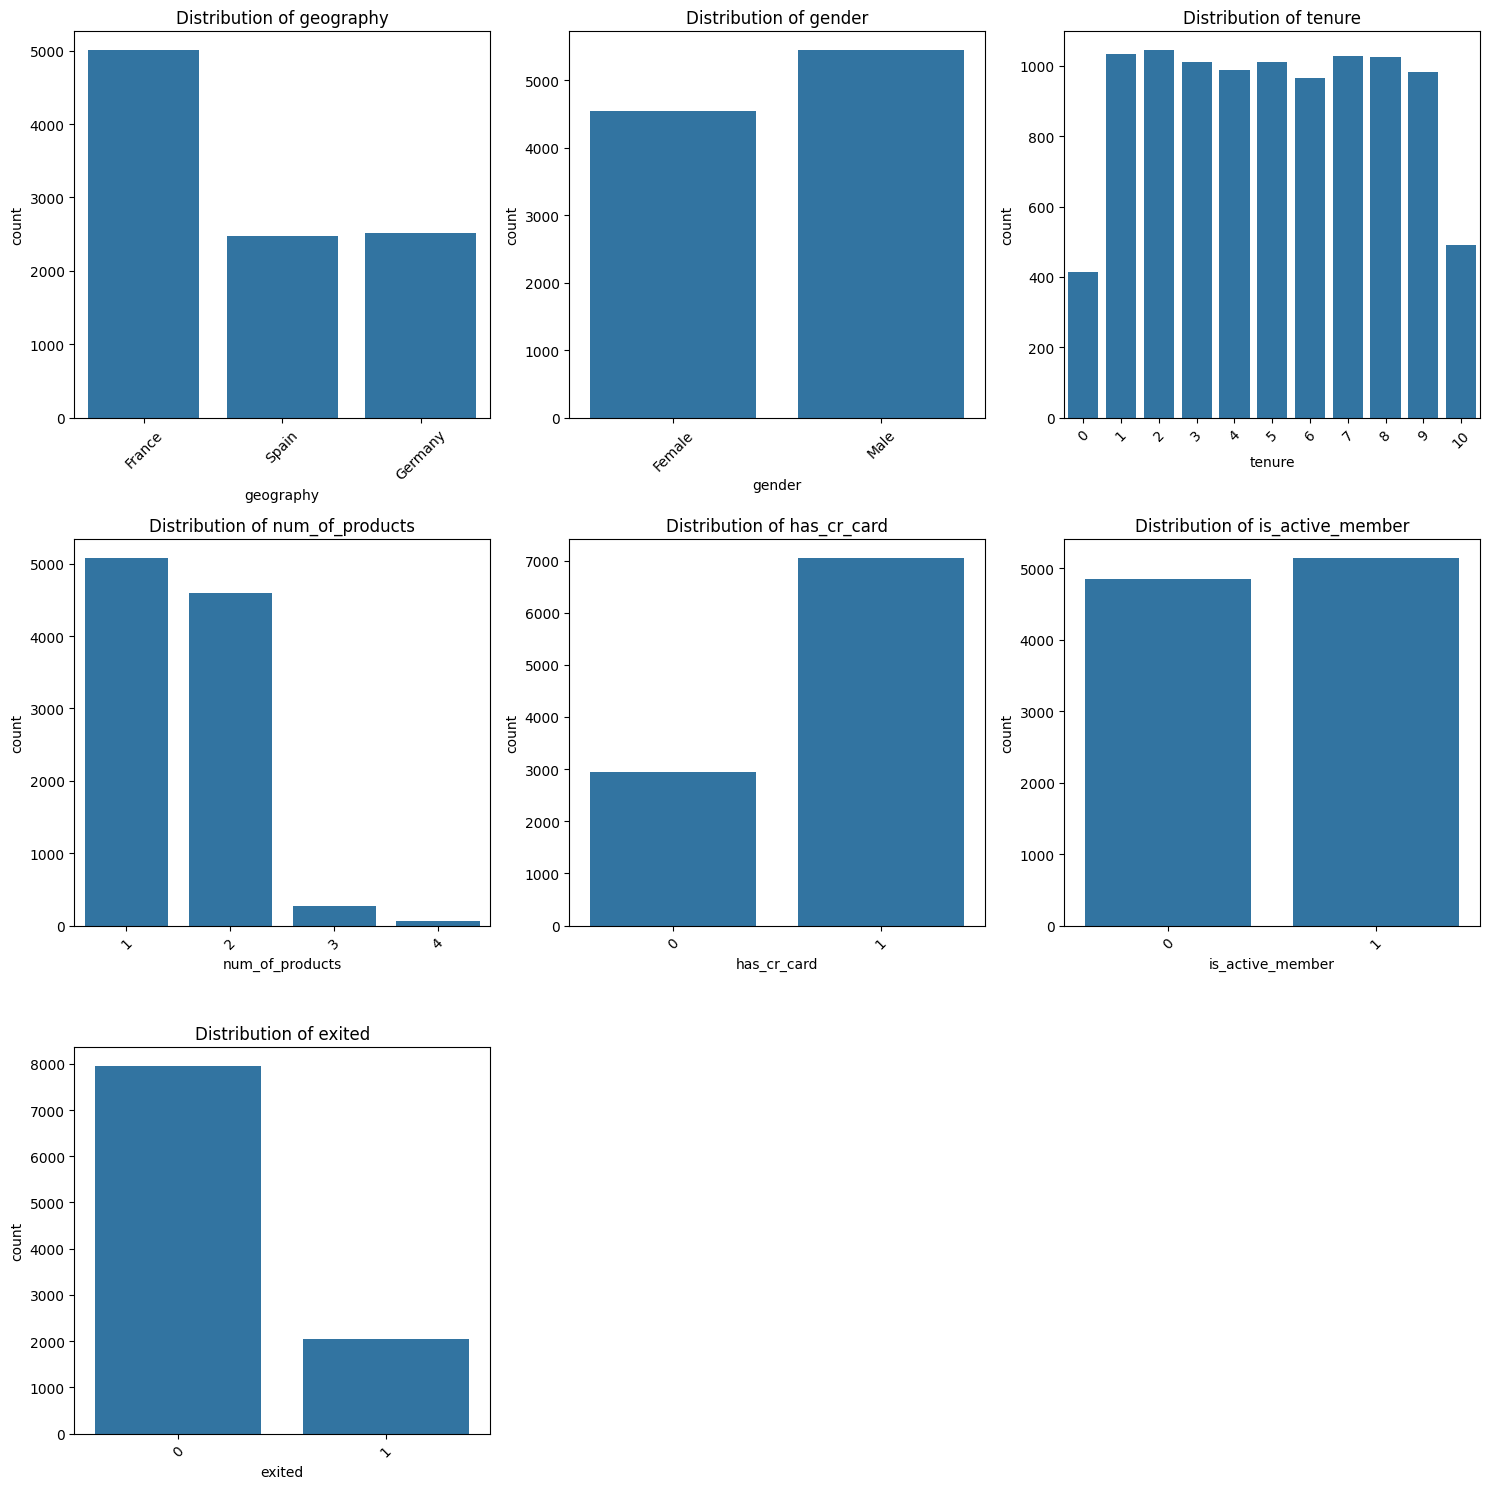

In [54]:
# 3.1.2. Visualizations: Bar charts
def plot_categorical_barplots(df, num_cols=3):
    """
    Generates bar plots for each categorical column in the DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the categorical columns.
        num_cols (int): The number of plots per row in the subplot grid. Default is 3.
    """
    # Determine the number of plots, rows, and columns for the subplots
    num_plots = len(df.columns)
    num_rows = math.ceil(num_plots / num_cols)
    
    # Set the figure size dynamically based on the number of rows and columns
    plt.figure(figsize=(num_cols * 5, num_rows * 5))
    
    for i, col in enumerate(df.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_categorical_barplots(df_categorical_analysis)


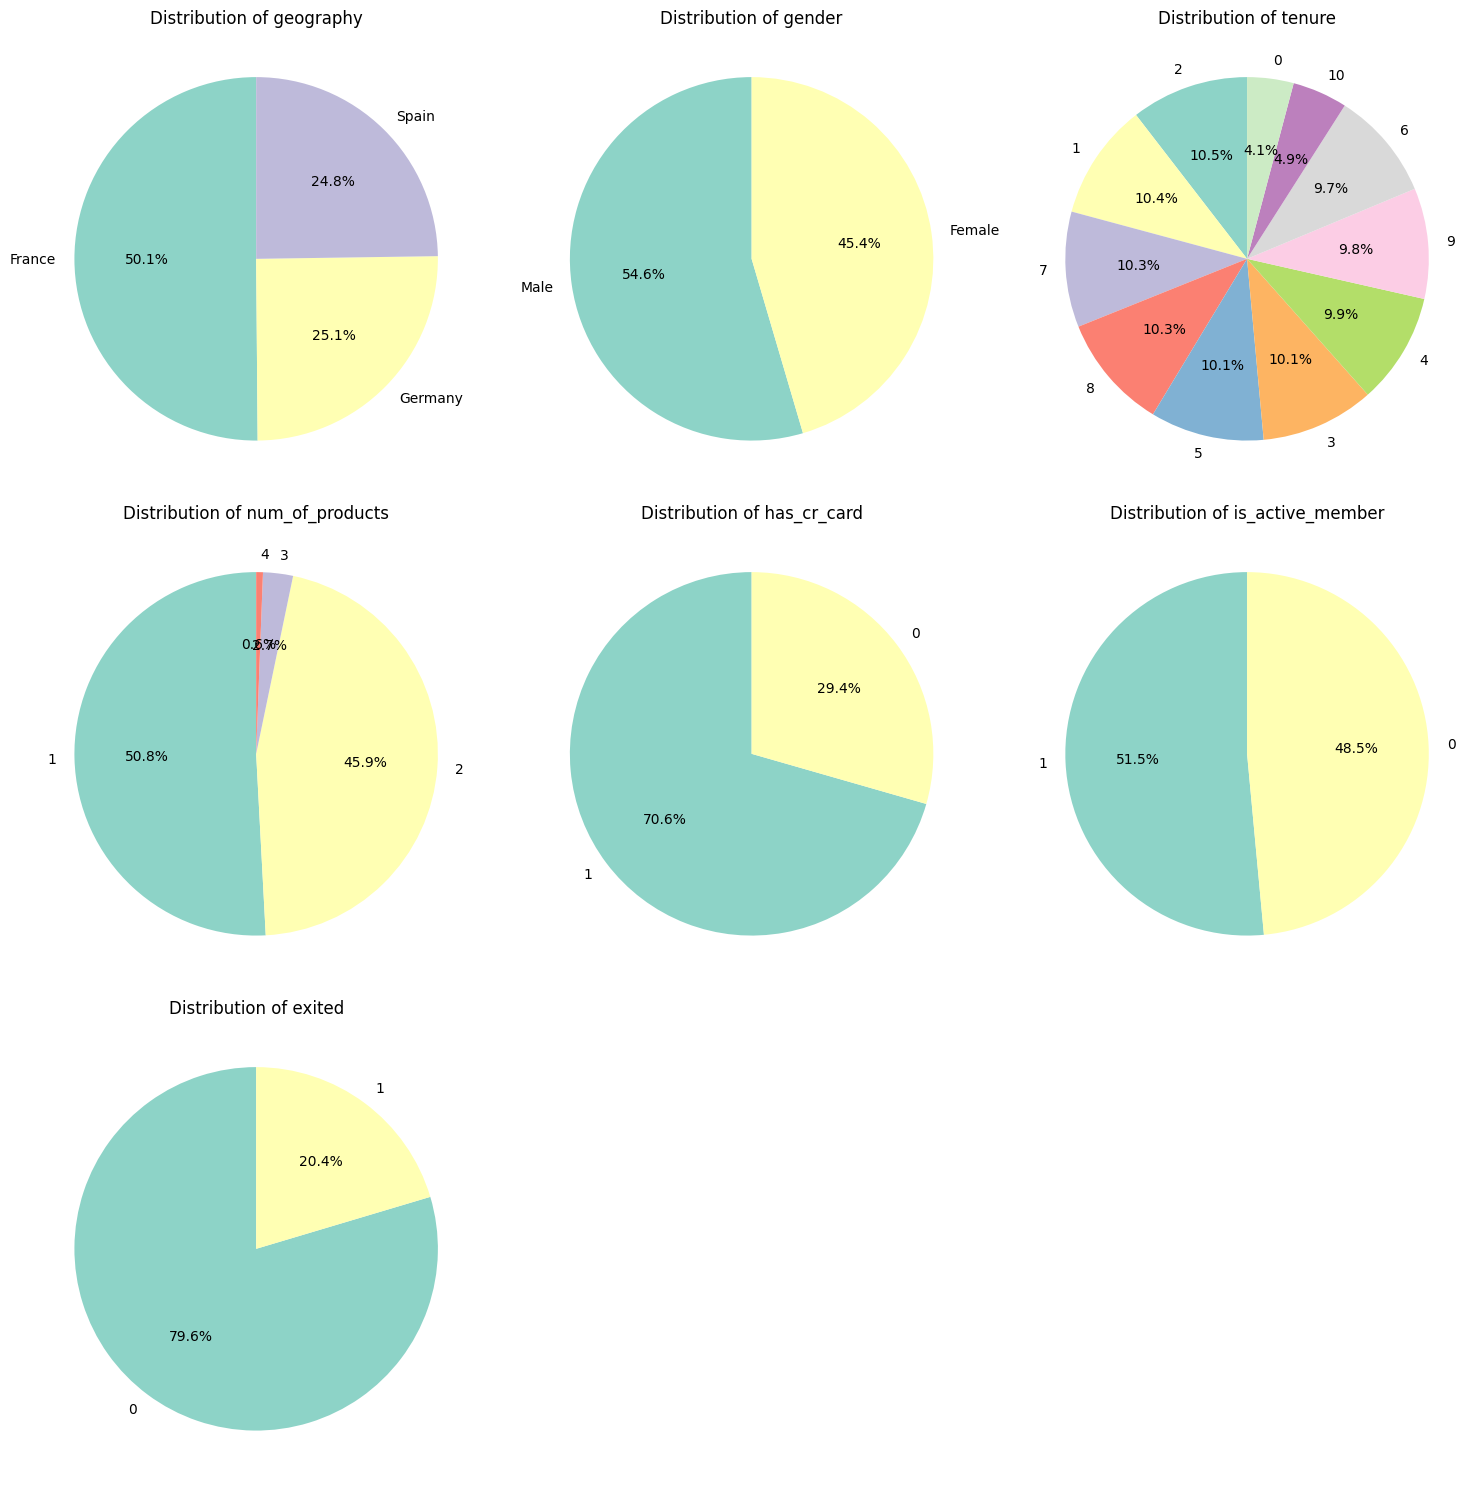

In [55]:
# 3.1.2. Visualizations: Pie charts:
def plot_categorical_pie_charts(df):
    """
    Generates pie charts for each categorical column in the DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the categorical columns.
    """
    # Determine the number of rows and columns for the subplots
    num_plots = len(df.columns)  # Use the number of columns for the number of plots
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)
    
    plt.figure(figsize=(num_cols * 5, num_rows * 5))
    
    for i, col in enumerate(df.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3"), startangle=90)
        plt.title(f'Distribution of {col}')
        plt.ylabel('')  # Hide the y-label for better aesthetics
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_categorical_pie_charts(df_categorical_analysis)


#### 3.2. Numerical variables:

In [56]:
# 3.2.1. Summary Statistics. Measures of centrality: Mean, median, mode.
# 3.2.2. Summary Statistics. Measures of dispersion: Variance, standard deviation, minimum, maximum, range, quantiles.
def summary_statistics(df):
    # Print summary statistics for numerical columns
    print("\nSummary Statistics:\n")
    return pd.DataFrame(df.describe())


summary_statistics(df_numerical_analysis)


Summary Statistics:



,credit_score,age,balance,estimated_salary
count,9998.000000,9998.000000,9998.000000,9998.000000
mean,650.529606,38.920184,76481.173035,100099.294959
std,96.633003,10.488004,62392.966945,57510.938172
min,350.000000,18.000000,0.000000,11.000000
25%,584.000000,32.000000,0.000000,50983.250000
50%,652.000000,37.000000,97172.500000,100218.000000
75%,718.000000,44.000000,127641.000000,149395.250000
max,850.000000,92.000000,250898.000000,199992.000000


#### 3.2.3. Shape of the distribution: Skewness(asymmetry) and kurtosis("tailedness" how peaked the distribution is).


**Interpretation**
1. **Skewness (shape of the distribution)**
 - Skewness = 0: Symmetrical distribution (No action needed).
 - Skewness > 0: Right-skewed (Consider log or square root transformation).
 - Skewness < 0: Left-skewed (Consider inverse or square transformation).
 - -0.5 to 0.5: Fairly symmetrical (Generally acceptable).
 - -1 to -0.5 or 0.5 to 1: Moderately skewed (Might require transformation).
 - <-1 or >1: Highly skewed (Transformation recommended).

2. **Kurtosis (outliers)**
 - Kurtosis = 3: Normal distribution (No action needed).
 - Kurtosis > 3: Heavy tails (Check for outliers, consider robust methods).
 - Kurtosis < 3: Light tails (Typically acceptable, fewer outliers).

In [57]:
# 3.2.3. Shape of the distribution: Skewness(asymmetry) and kurtosis("tailedness" how peaked the distribution is).
def calculate_skewness_kurtosis(df):
    """
    Calculates skewness and kurtosis for each column in the DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
    
    Returns:
        pd.DataFrame: A DataFrame containing skewness and kurtosis for each column.
    """
    results = {'Column': [], 'Skewness': [], 'Kurtosis': []}
    
    for column in df.columns:
        skewness = round(df[column].skew(), 2)
        kurtosis = round(df[column].kurtosis(), 2)
        
        results['Column'].append(column)
        results['Skewness'].append(skewness)
        results['Kurtosis'].append(kurtosis)
    
    return pd.DataFrame(results)

calculate_skewness_kurtosis(df_numerical_analysis)

,Column,Skewness,Kurtosis
0,credit_score,-0.07,-0.43
1,age,1.01,1.40
2,balance,-0.14,-1.49
3,estimated_salary,0.00,-1.18


#### 3.2.4. Visualizations: Histograms (the frequency distribution of a dataset), box plots

array([[<Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'estimated_salary'}>]], dtype=object)

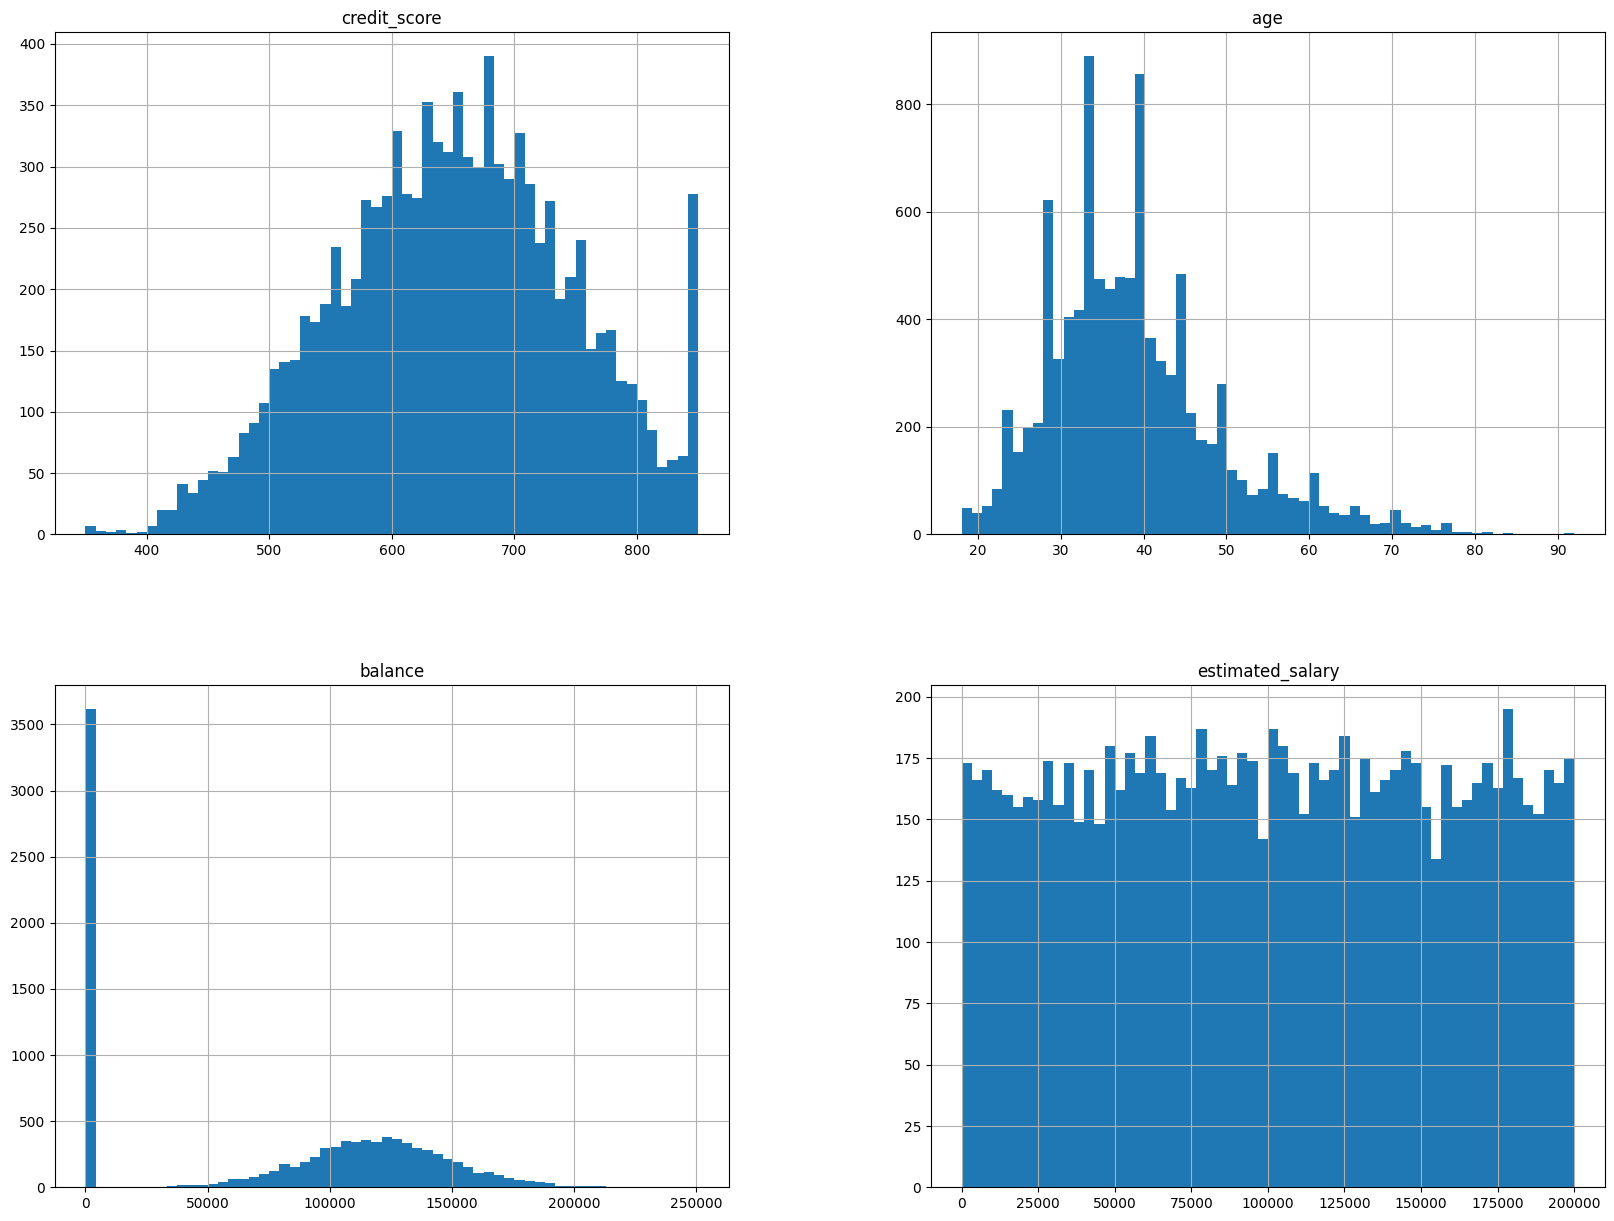

In [58]:
# 3.2.4. Visualizations: Histograms
#Histograms display the frequency distribution of a dataset. The height of each bar represents the number of data points in each bin.
df_numerical_analysis.hist(figsize=(20, 15), bins=60, xlabelsize=10, ylabelsize=10)


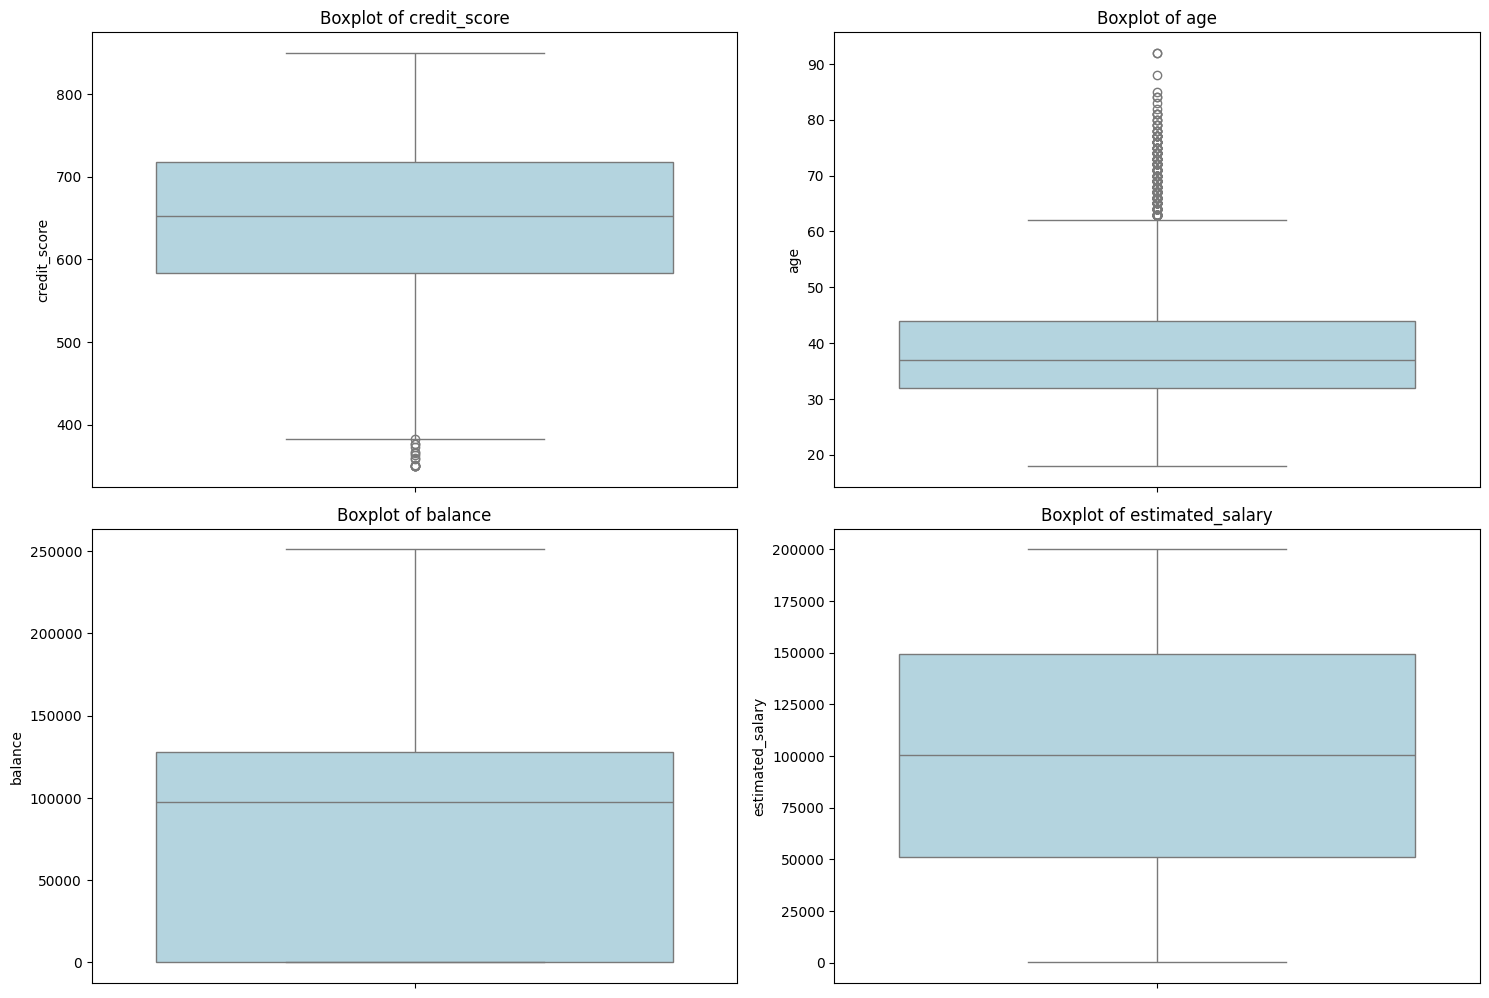

In [59]:
# 3.2.4. Visualizations: box plots.
def plot_boxplots(df):
    """
    Generates boxplots for each column in a DataFrame, arranged with 2 plots per row.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the numerical data.
    """
    num_cols = 2  # Number of plots per row
    num_rows = 3  # Total number of rows
    total_plots = num_cols * num_rows
    
    plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure size based on the number of rows
    
    for i, column in enumerate(df.columns[:total_plots], 1):  # Limit to the first 6 columns
        plt.subplot(num_rows, num_cols, i)
        sns.boxplot(data=df[column], color="lightblue")
        plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

plot_boxplots(df_numerical_analysis)

#### **3.3. Univariate Analysis Summary**
- "age" col needs logarithmic or square root transformation to address the positive skewness to normalize it. (Before Splitting Data into Training and Test Sets)
- "balance" right skewness Logarithmic Transformation or Square Root Transformation
- "credit_score" normalize the feature to scale it to a standard range. Or Logarithmic Transformation or Square Root Transformation
- df['credit_score_sqrt'] = np.sqrt(df['credit_score'])
- df['credit_score_log'] = np.log1p(df['credit_score'])

## 4. Bivariate Analysis
- 4.1. Categorical (including Discrete Numerical) vs Categorical
  - 4.1.1. Crosstab
  - 4.1.2.Chi-square tests, Cramér's V. Test the independence of variables
  - 4.1.3. Visualization:
    - 4.1.3.1. Stacked or grouped bar charts
    - 4.1.3.2. Frequency heat maps
  - 4.1.3. Summary for Categorical vs Categorical Analysis

- 4.2. Categorical vs Continuous
  - 4.2.1. Visualization:
    - 4.2.1.1. Violin Plots
    - 4.2.1.2. Bar Charts
    - 4.2.1.3. Side by side Box Plots
- 4.3. Continuous vs Continuous
  - 4.3.1. Correlation coefficients
  - 4.3.2. Visualization:
    - 4.3.2.1. Scatter plots
    - 4.3.2.2. Line plots
    - 4.3.2.3. Correlation Heatmaps
    - 4.3.2.4. QQ Plot
- 4.4. Bivariate Analysis Summary. Select target.

#### 4.1. Categorical (including Discrete Numerical) vs Categorical

#### Chi-square tests and Cramer's test

Chi-square is a measure of statistical significance. It answers the question, “Is there a relationship between our dependent variable and our independent variable?” Cramer's V is a measure of substantive significance. It answers the question, “How strong does the relationship appear to be?”

In [ ]:
# 4.1.1. Chi-square tests: **determine whether there is a significant association between two categorical variables**  
#Interpretation: if p-value < 0.05, this suggests that there is a significant association between the categorical variables. P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables. 
def calculate_chi2_for_crosstabs(df):
    """
    Generates crosstabs for all unique pairs of categorical columns in the DataFrame,
    and performs the Chi-square test of independence on each crosstab.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the categorical data.
    
    Returns:
        dict: A dictionary where keys are column pairs and values are tuples containing 
              the Chi-square statistic and p-value.
    """
    
    for i, col1 in enumerate(df):
        for col2 in df[i+1:]:
            crosstab_result = pd.crosstab(df[col1], df[col2])
            
            # Perform Chi-square test
            try:
                chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
                chi2_results[(col1, col2)] = (chi2_statistic, chi2_p_value)
                
                # Display the result
                print(f"\nChi-square test for {col1} vs {col2}:")
                print(f"  Chi2 Statistic: {chi2_statistic:.4f}, P-Value: {chi2_p_value:.4f}")
            
            except ValueError as e:
                print(f"Error calculating Chi-square for {col1} vs {col2}: {e}")
                chi2_results[(col1, col2)] = (None, None)
    
    return chi2_results

# Example usage
chi2_results = calculate_chi2_for_crosstabs(df_categorical_analysis)


Chi-square test for geography vs geography:
  Chi2 Statistic: 19996.0000, P-Value: 0.0000

Chi-square test for geography vs gender:
  Chi2 Statistic: 6.8556, P-Value: 0.0325

Chi-square test for geography vs tenure:
  Chi2 Statistic: 34.2298, P-Value: 0.0246

Chi-square test for geography vs num_of_products:
  Chi2 Statistic: 48.9848, P-Value: 0.0000

Chi-square test for geography vs has_cr_card:
  Chi2 Statistic: 2.2945, P-Value: 0.3175

Chi-square test for geography vs is_active_member:
  Chi2 Statistic: 5.2947, P-Value: 0.0708

Chi-square test for geography vs exited:
  Chi2 Statistic: 301.9215, P-Value: 0.0000

Chi-square test for gender vs geography:
  Chi2 Statistic: 6.8556, P-Value: 0.0325

Chi-square test for gender vs gender:
  Chi2 Statistic: 9993.9668, P-Value: 0.0000

Chi-square test for gender vs tenure:
  Chi2 Statistic: 16.4117, P-Value: 0.0884

Chi-square test for gender vs num_of_products:
  Chi2 Statistic: 20.4566, P-Value: 0.0001

Chi-square test for gender vs has_c

#### Chi-Square Test Results Interpretation 

1. Geography vs Gender: Significant association (p=0.0325) - Gender distribution varies by geography.
2. Geography vs Tenure: Significant association (p=0.0246) - Tenure differs across geographies.
3. Geography vs Number of Products: Significant association (p=0.0000) - Product holding varies by region.
4. Geography vs Has Credit Card: No significant association (p=0.3175) - Credit card ownership is consistent across regions.
5. Geography vs Is Active Member: No significant association (p=0.0708) - Active membership is similar across geographies.
6. Geography vs Exited (Churn): Significant association (p=0.0000) - Churn rates vary significantly by region.
7. Gender vs Tenure: No significant association (p=0.0884) - Tenure is similar between genders.
8. Gender vs Number of Products: Significant association (p=0.0001) - Product holding differs between genders.
9. Gender vs Has Credit Card: No significant association (p=0.5735) - Credit card ownership is similar between genders.
10. Gender vs Is Active Member: Significant association (p=0.0264) - Active membership differs slightly by gender.
11. Gender vs Exited (Churn): Significant association (p=0.0000) - Churn rates differ significantly by gender.
12. Tenure vs Number of Products: Significant association (p=0.0001) - Product holding varies with tenure.
13. Tenure vs Has Credit Card: No significant association (p=0.0774) - Credit card ownership is not influenced by tenure.
14. Tenure vs Is Active Member: No significant association (p=0.1763) - Active membership does not vary by tenure.
15. Tenure vs Exited (Churn): No significant association (p=0.1805) - Churn is not significantly related to tenure.
16. Number of Products vs Has Credit Card: No significant association (p=0.9416) - Product holding does not affect credit card ownership.
17. Number of Products vs Is Active Member: Significant association (p=0.0007) - Product holding influences active membership.
18. Number of Products vs Exited (Churn): Significant association (p=0.0000) - Churn varies significantly with the number of products held.
19. Has Credit Card vs Is Active Member: No significant association (p=0.2373) - Credit card ownership does not affect active membership.
20. Has Credit Card vs Exited (Churn): No significant association (p=0.4997) - Credit card ownership does not impact churn.
21. Is Active Member vs Exited (Churn): Significant association (p=0.0000) - Active membership strongly affects churn rates.

#### Summary:
- Key Associations: Geography, gender, product holding, and active membership are significantly associated with churn.
- Less Influential Factors: Tenure and credit card ownership show no significant associations with key outcomes.

In [ ]:
# 4.1.2.  Cramér's V. Test the independence of variables
#- Cramer's V is a measure of association used to **quantify the strength of the relationship between categorical variables**. 
#- Interpretation: Cramer's V ranges from 0 to 1, where **0 indicates no association, and 1 represents a perfect association between the variables**. A higher value of Cramer's V indicates a stronger relationship between the categorical variables.
# Computing the association between variables in 'crosstab_result' using the "cramer" method
def calculate_cramers_v_for_all_pairs(df):
    """
    Calculates Cramér's V for the association between all unique pairs of categorical columns in the DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.

    Returns:
        dict: A dictionary where keys are pairs of column names and values are the corresponding Cramér's V value.
    """
    for i, col1 in enumerate(categorical_columns):
        for col2 in categorical_columns[i+1:]:
            crosstab_result = pd.crosstab(df[col1], df[col2])
            cramers_v = association(crosstab_result, method="cramer")
            cramers_v_results[(col1, col2)] = cramers_v
    
    # Print the results
    for pair, value in cramers_v_results.items():
        print(f"Cramér's V for {pair[0]} vs {pair[1]}: {value:.4f}")
    
    return cramers_v_results

# Example usage
cramers_v_results = calculate_cramers_v_for_all_pairs(df_categorical_analysis)

Cramér's V for num_of_products vs exited: 0.3875
Cramér's V for geography vs exited: 0.1738
Cramér's V for is_active_member vs exited: 0.1561
Cramér's V for gender vs exited: 0.1062
Cramér's V for geography vs num_of_products: 0.0495
Cramér's V for tenure vs num_of_products: 0.0477
Cramér's V for gender vs num_of_products: 0.0452
Cramér's V for geography vs tenure: 0.0414
Cramér's V for num_of_products vs is_active_member: 0.0414
Cramér's V for tenure vs has_cr_card: 0.0411
Cramér's V for gender vs tenure: 0.0405
Cramér's V for tenure vs is_active_member: 0.0373
Cramér's V for tenure vs exited: 0.0372
Cramér's V for geography vs gender: 0.0262
Cramér's V for geography vs is_active_member: 0.0230
Cramér's V for gender vs is_active_member: 0.0224
Cramér's V for geography vs has_cr_card: 0.0151
Cramér's V for has_cr_card vs is_active_member: 0.0120
Cramér's V for has_cr_card vs exited: 0.0070
Cramér's V for num_of_products vs has_cr_card: 0.0063
Cramér's V for gender vs has_cr_card: 0.005

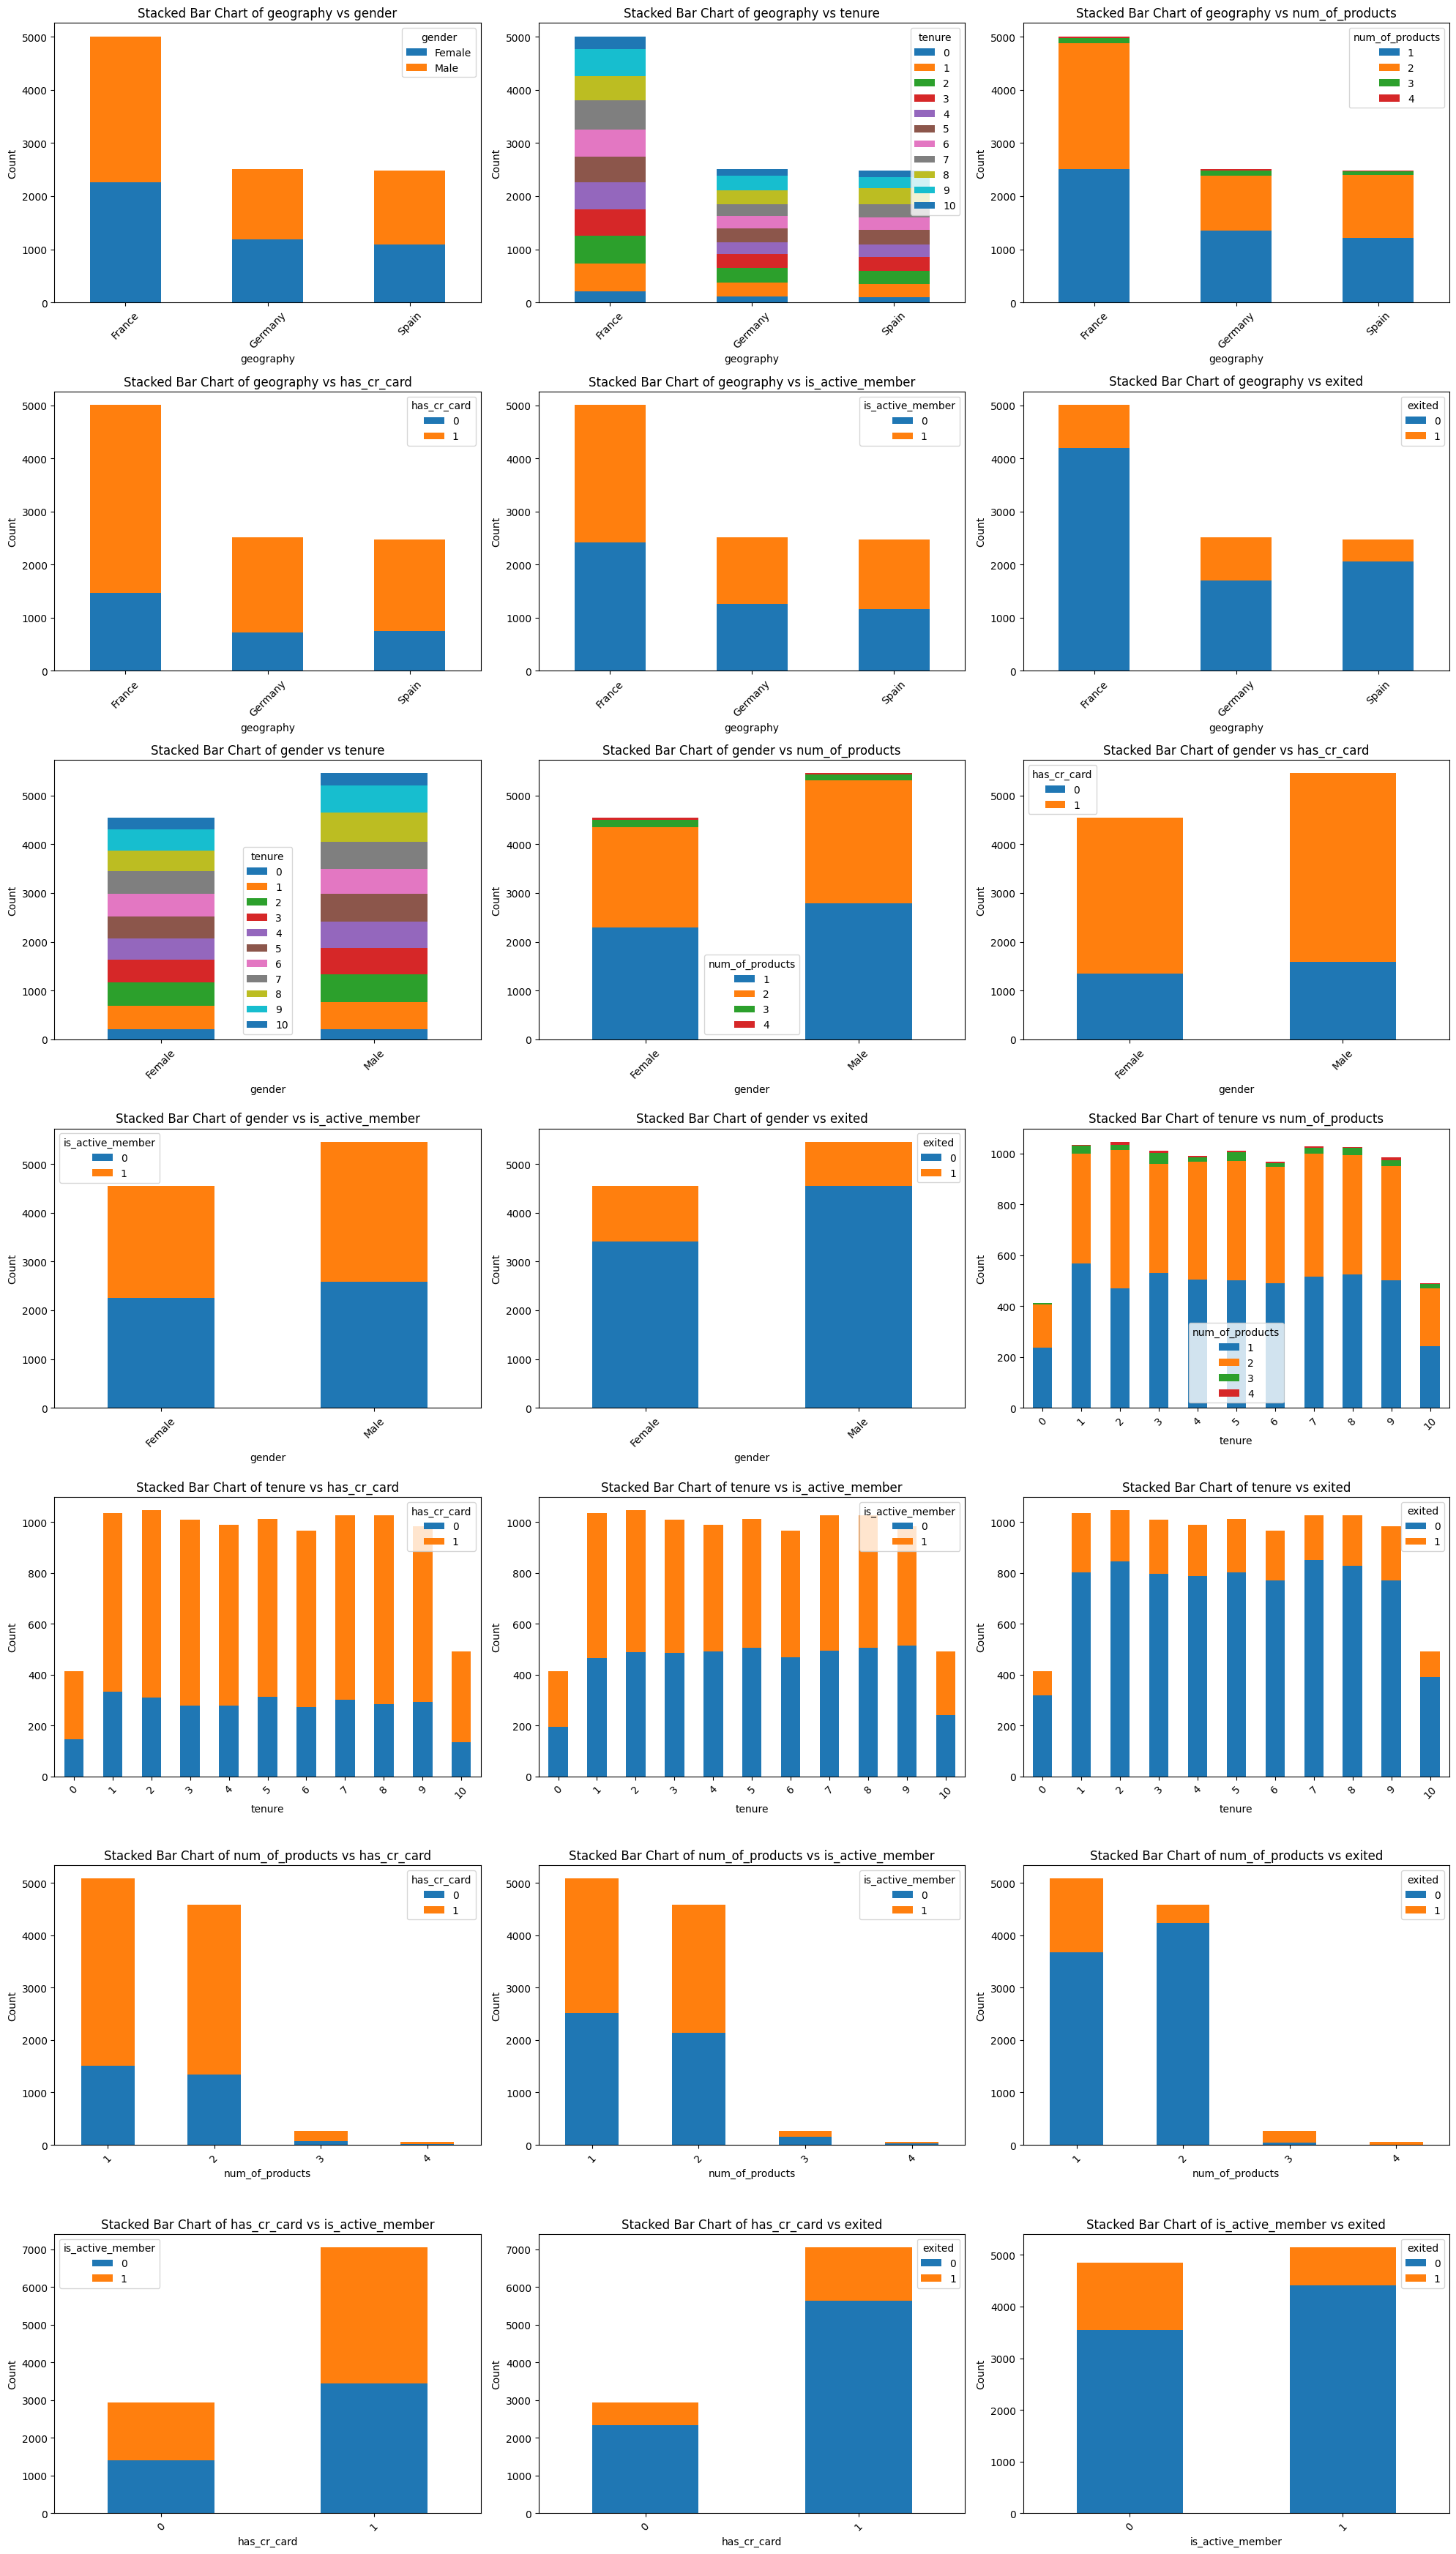

In [ ]:
# 4.1.3. Visualization stacked bar
# Plotting a stacked bar chart for the 'crosstab_result' data
def plot_stacked_bar_charts_for_all_pairs(df):
    """
    Generates stacked bar charts for the crosstabs of all unique pairs of columns in the DataFrame,
    excluding self-pairs and duplicate pairs. Displays 3 stacked bar charts per row.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.

    Returns:
        None
    """
    num_plots = len(df.columns) * (len(df.columns) - 1) // 2
    num_cols = 3
    num_rows = (num_plots // num_cols) + int(num_plots % num_cols != 0)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

    # Flatten axes if necessary (handles cases where only 1 row or column)
    axes = axes.flatten() if num_rows > 1 else [axes]

    plot_idx = 0
    for i, col1 in enumerate(df.columns):
        for col2 in df.columns[i+1:]:
            ax = axes[plot_idx]
            crosstab_result = pd.crosstab(df[col1], df[col2])
            crosstab_result.plot(kind="bar", stacked=True, ax=ax)
            ax.set_title(f'Stacked Bar Chart of {col1} vs {col2}')
            ax.set_xlabel(col1)
            ax.set_ylabel('Count')
            ax.tick_params(axis='x', rotation=45)
            plot_idx += 1

    # Hide any unused subplots
    for j in range(plot_idx, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_stacked_bar_charts_for_all_pairs(df_categorical_analysis)

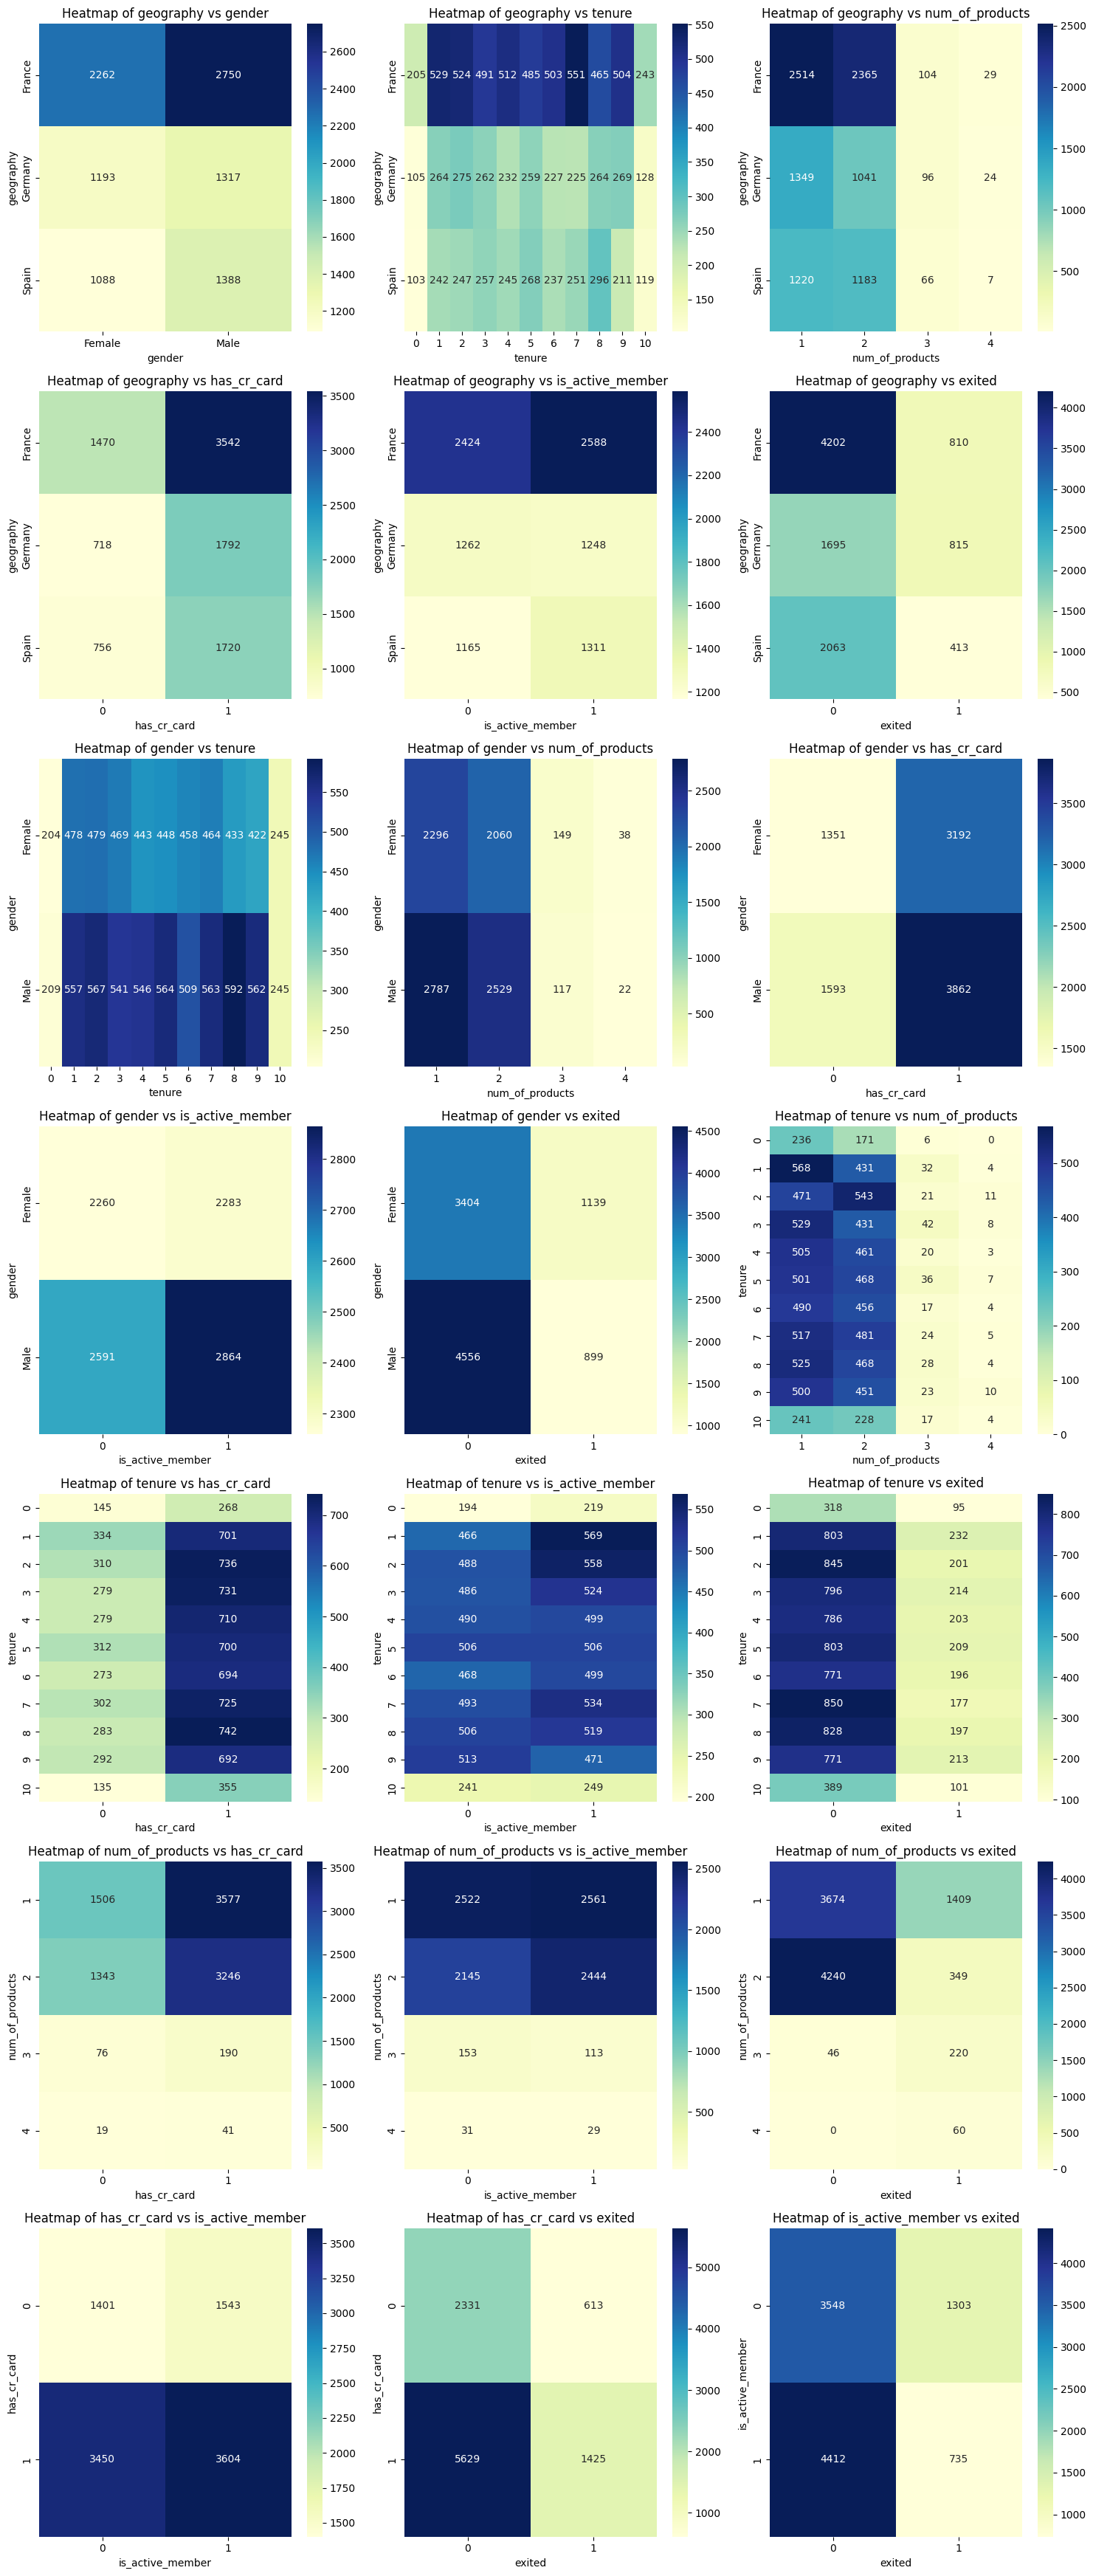

In [ ]:
# 4.1.4. Visualization Frequency heat maps
def plot_heatmaps_for_all_pairs(df):
    """
    Generates heatmaps for the crosstabs of all unique pairs of columns in the DataFrame,
    excluding self-pairs and duplicate pairs. Displays 3 heatmaps per row.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.

    Returns:
        None
    """
    num_plots = len(df.columns) * (len(df.columns) - 1) // 2
    num_cols = 3
    num_rows = (num_plots // num_cols) + int(num_plots % num_cols != 0)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

    # Flatten axes if necessary (handles cases where only 1 row or column)
    axes = axes.flatten() if num_rows > 1 else [axes]

    plot_idx = 0
    for i, col1 in enumerate(df.columns):
        for col2 in df.columns[i+1:]:
            ax = axes[plot_idx]
            crosstab_result = pd.crosstab(df[col1], df[col2])
            sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d", ax=ax)
            ax.set_title(f'Heatmap of {col1} vs {col2}')
            plot_idx += 1

    # Hide any unused subplots
    for j in range(plot_idx, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_heatmaps_for_all_pairs(df_categorical_analysis)